# Woche 9: Machine Learning 1 - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten ML-Konzepte kennengelernt haben, wenden Sie Ihr erstes Machine Learning Modell auf Ihren eigenen bereinigten Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Entscheiden Sie zunächst, ob Ihr Problem ein Classification- oder Regression-Problem ist
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus den Slides
- Evaluieren Sie Ihr Modell und dokumentieren Sie (ganz wichtig!) die Ergebnisse

**Wichtig:** Machine Learning ist optional für Ihr Projekt! Wenn Ihr Datensatz oder Ihre Forschungsfrage sich nicht für ML eignet, können Sie diese Woche auch überspringen und sich auf Visualisierungen und Streamlit konzentrieren.

---
## 1. Bibliotheken importieren und Daten einlesen

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren bereinigten Datensatz aus Woche 7.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`
- Importieren Sie sklearn Module: `train_test_split`, verschiedene Modelle, Metriken
- Laden Sie Ihren bereinigten CSV-Datensatz

In [1]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Warnungen unterdrücken (optional)
import warnings
warnings.filterwarnings('ignore')

# Zufallsseed für Reproduzierbarkeit
np.random.seed(42)

# Bereinigten Datensatz einlesen
df = pd.read_csv('../Sleep_health_and_lifestyle_dataset_cleaned.csv')


---
## 2. Überblick über den Datensatz

**Aufgabe:** Verschaffen Sie sich -wie immer- einen Überblick über Ihren Datensatz.

**Was Sie prüfen sollten:**
- Dimensionen des Datensatzes
- Datentypen der Spalten
- Statistische Kennzahlen
- Erste Zeilen anzeigen

In [12]:
# Dimensionen
print('Dimesion: ')
print(df.shape)

# Erste Zeilen
df.head()

Dimesion: 
(374, 13)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,0,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Underweight,75,10000,0,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Underweight,75,10000,0,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140.0,90.0


In [13]:
# Informationen zu Spalten
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic                 374 non-null    float64
 12  Diastolic                374 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 38.1+ KB
None


In [14]:
# Statistische Übersicht für numerische Spalten
numeric_values = df.select_dtypes(include=[np.number])
numeric_values

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,27,6.1,6,42,6,77,4200,0,126.0,83.0
1,28,6.2,6,60,8,75,10000,0,125.0,80.0
2,28,6.2,6,60,8,75,10000,0,125.0,80.0
3,28,5.9,4,30,8,85,3000,1,140.0,90.0
4,28,5.9,4,30,8,85,3000,1,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,1,140.0,95.0
370,59,8.0,9,75,3,68,7000,1,140.0,95.0
371,59,8.1,9,75,3,68,7000,1,140.0,95.0
372,59,8.1,9,75,3,68,7000,1,140.0,95.0


---
## 3. ML Problem-Typ identifizieren

**Aufgabe:** Entscheiden Sie, welchen Typ von ML-Problem Sie lösen möchten. Denken Sie darüber vertieft nach und nehmen Sie sich dafür ruhig mehr Zeit!

### Classification (Klassifikation)
- **Ziel:** Kategorie vorhersagen
- **Beispiele:** 
  - Mental Health: Depression ja/nein
  - Wetter: Regentyp (leicht/mittel/stark)
  - Finanzen: Kreditrisiko (niedrig/mittel/hoch)
  - Social Media: Sentiment (positiv/negativ/neutral)
  - Kosmetik: Produktkategorie
  - Astronomie: Objekttyp (Stern/Planet/Galaxie)

### Regression
- **Ziel:** Kontinuierlichen Wert vorhersagen
- **Beispiele:**
  - Wetter: Temperatur in °C
  - Finanzen: Aktienkurs, Preis
  - Social Media: Anzahl Likes/Shares
  - Kosmetik: Produktpreis
  - Astronomie: Entfernung, Helligkeit
  - Mental Health: Depressions-Score (0-100)

**Dokumentieren Sie Ihre Entscheidung:**

### Mein ML-Problem:

**Problem-Typ:** [Classification / Regression]

**Forschungsfrage:**
- ...

**Target-Variable (y):**
- Spaltenname: ...
- Typ: ...
- Bedeutung: ...

**Mögliche Features (X):**
- ...
- ...
- ...

---
## 4. Features (X) und Target (y) definieren

**Aufgabe:** Wählen Sie Ihre Features und Target-Variable aus.

**Wichtige Hinweise:**
- **Features (X):** Sollten numerisch sein (kategoriale Features müssen später encodiert werden)
- **Target (y):** 
  - Bei Classification: Kategoriale Variable (z.B. 'ja'/'nein', 'Typ A'/'Typ B'/'Typ C')
  - Bei Regression: Numerische Variable (z.B. Temperatur, Preis, Score)
- Beginnen Sie mit 2-5 Features
- Entfernen Sie Zeilen mit fehlenden Werten in Features oder Target

In [16]:
# Überprüfen Sie, welche Spalten als Features in Frage kommen
# Numerische Spalten:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerische Spalten:", list(numeric_cols))

# Kategoriale Spalten:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Kategoriale Spalten:", list(categorical_cols))


Numerische Spalten: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic', 'Diastolic']
Kategoriale Spalten: ['Gender', 'Occupation', 'BMI Category']


In [17]:
# Features (X) und Target (y) definieren

# Beispiel für Classification:
X = df[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]
y = df['Quality of Sleep']

# Beispiel für Regression:
# X = df[['feature1', 'feature2', 'feature3']]
# y = df['target_wert']

# Fehlende Werte entfernen
# df_model = df[['feature1', 'feature2', 'feature3', 'target']].dropna()
# X = df_model[['feature1', 'feature2', 'feature3']]
# y = df_model['target']

print(f"Anzahl Samples: {len(X)}")
print(f"Anzahl Features: {X.shape[1]}")
print(f"\nTarget-Verteilung:")
print(y.value_counts())  # Für Classification
# print(y.describe())  # Für Regression


Anzahl Samples: 374
Anzahl Features: 7

Target-Verteilung:
Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64


---
## 5. Explorative Datenanalyse (EDA) für ML

**Aufgabe:** Untersuchen Sie die Beziehung zwischen Features und Target.

**Für Classification:**
- Boxplots: Features nach Target-Kategorien
- Visualisieren Sie, ob sich die Klassen unterscheiden

**Für Regression:**
- Scatter Plots: Features vs. Target
- Korrelation zwischen Features und Target

In [ ]:
# Beispiel für Classification: Boxplots
# fig, axes = plt.subplots(1, len(X.columns), figsize=(15, 4))
# for i, col in enumerate(X.columns):
#     df_model.boxplot(column=col, by='target', ax=axes[i])
#     axes[i].set_title(f'{col} nach Target')
# plt.tight_layout()
# plt.show()


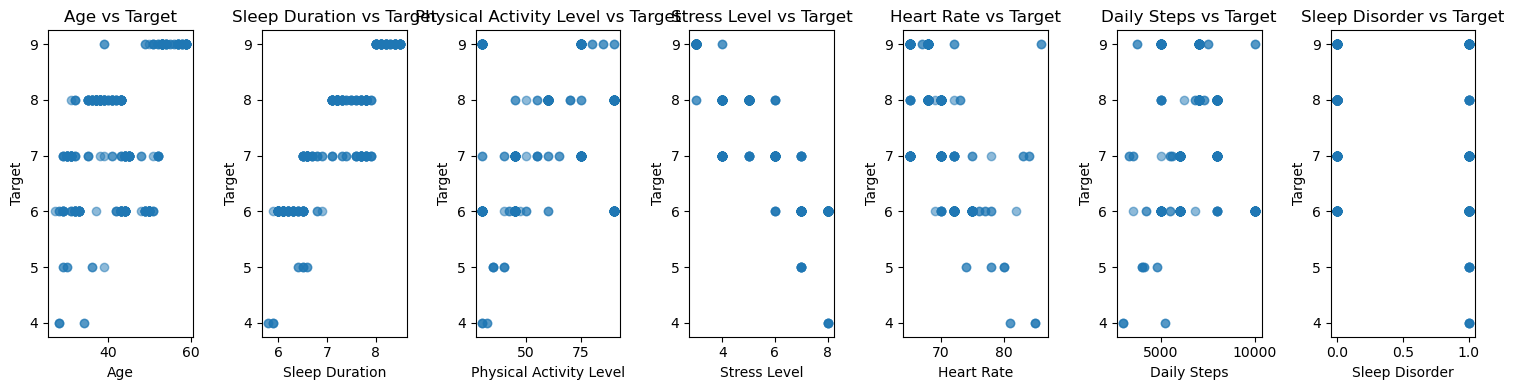

In [19]:
# Beispiel für Regression: Scatter Plots
fig, axes = plt.subplots(1, len(X.columns), figsize=(15, 4))
for i, col in enumerate(X.columns):
    axes[i].scatter(df[col], y, alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Target')
    axes[i].set_title(f'{col} vs Target')
plt.tight_layout()
plt.show()


In [37]:
# Optional: Korrelationsmatrix (für Regression)
# correlation_matrix = df_model.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Korrelationsmatrix')
# plt.show()
df[(df['Quality of Sleep'] == 9) & (df['Sleep Disorder'] == 1)]


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
276,Male,49,Doctor,8.1,9,85,3,Obese,86,3700,1,139.0,91.0
277,Male,49,Doctor,8.1,9,85,3,Obese,86,3700,1,139.0,91.0
315,Female,53,Engineer,8.3,9,30,3,Underweight,65,5000,1,125.0,80.0
339,Female,55,Nurse,8.1,9,75,4,Overweight,72,5000,1,140.0,95.0
340,Female,55,Nurse,8.1,9,75,4,Overweight,72,5000,1,140.0,95.0
344,Female,57,Nurse,8.2,9,75,3,Overweight,68,7000,1,140.0,95.0
345,Female,57,Nurse,8.2,9,75,3,Overweight,68,7000,1,140.0,95.0
346,Female,57,Nurse,8.2,9,75,3,Overweight,68,7000,1,140.0,95.0
347,Female,57,Nurse,8.2,9,75,3,Overweight,68,7000,1,140.0,95.0
348,Female,57,Nurse,8.2,9,75,3,Overweight,68,7000,1,140.0,95.0


In [38]:
df[(df['Quality of Sleep'] == 8) & (df['Sleep Disorder'] == 1)]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
94,Female,36,Accountant,7.2,8,60,4,Underweight,68,7000,1,115.0,75.0
104,Female,36,Teacher,7.2,8,60,4,Underweight,68,7000,1,115.0,75.0
144,Male,38,Lawyer,7.1,8,60,5,Underweight,68,8000,1,130.0,85.0
146,Male,39,Lawyer,7.2,8,60,5,Underweight,68,8000,1,130.0,85.0
165,Male,41,Lawyer,7.6,8,90,5,Underweight,70,8000,1,130.0,85.0
201,Male,43,Engineer,7.8,8,90,5,Underweight,70,8000,1,130.0,85.0
202,Male,43,Engineer,7.8,8,90,5,Underweight,70,8000,1,130.0,85.0
218,Male,43,Engineer,7.8,8,90,5,Underweight,70,8000,1,130.0,85.0


In [39]:
df[(df['Quality of Sleep'] == 7) & (df['Sleep Disorder'] == 1)]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
49,Male,31,Doctor,7.7,7,75,6,Underweight,70,8000,1,120.0,80.0
93,Male,35,Lawyer,7.4,7,60,5,Obese,84,3300,1,135.0,88.0
145,Female,38,Lawyer,7.4,7,60,5,Obese,84,3300,1,135.0,88.0
186,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,1,135.0,90.0
188,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,1,135.0,90.0
190,Female,43,Teacher,6.7,7,45,4,Overweight,65,6000,1,135.0,90.0
220,Female,44,Teacher,6.6,7,45,4,Overweight,65,6000,1,135.0,90.0
224,Female,44,Teacher,6.6,7,45,4,Overweight,65,6000,1,135.0,90.0
226,Female,44,Teacher,6.6,7,45,4,Overweight,65,6000,1,135.0,90.0
228,Female,44,Teacher,6.6,7,45,4,Overweight,65,6000,1,135.0,90.0


In [41]:
df[df['Sleep Disorder'] == 1]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140.0,90.0
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,1,140.0,90.0
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,1,140.0,90.0
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,80,4000,1,132.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140.0,95.0
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,1,140.0,95.0
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140.0,95.0
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140.0,95.0


**Ihre Beobachtungen:**
- Welche Features scheinen am wichtigsten?
- Gibt es klare Muster?
- ...

---
## 6. Train/Test Split

**Aufgabe:** Teilen Sie Ihre Daten in Trainings- und Testdaten auf.

**Warum?** 
- Training Set (80%): Modell lernt hier
- Test Set (20%): Modell wird hier evaluiert
- Verhindert Overfitting!

**Wichtig:** Testen Sie das Modell NIEMALS auf Trainingsdaten!

In [43]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% für Testing
    random_state=42     # Reproduzierbarkeit
)

print(f"Training Set: {len(X_train)} samples")
print(f"Test Set: {len(X_test)} samples")
print(f"\nTraining Set - Target Verteilung:")
# print(y_train.value_counts())  # Für Classification
print(y_train.describe())  # Für Regression


Training Set: 299 samples
Test Set: 75 samples

Training Set - Target Verteilung:
count    299.000000
mean       7.364548
std        1.183307
min        4.000000
25%        6.000000
50%        8.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64


---
## 7A. ML Modelle - CLASSIFICATION

**⚠️ Nur für Classification-Probleme! Überspringen Sie diese Sektion, wenn Sie Regression machen.**

**Aufgabe:** Trainieren Sie verschiedene Classification-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Nearest Centroid Classifier (NCC) - sehr einfach
2. K-Nearest Neighbors (KNN) - ähnlich zu NCC, aber flexibler
3. Decision Tree - findet Regeln automatisch
4. Logistic Regression - trotz Namen für Classification!

In [ ]:
# Classification Algorithmen importieren
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# 1. Nearest Centroid Classifier
print("=== Nearest Centroid Classifier ===")
ncc = NearestCentroid()
ncc.fit(X_train, y_train)
y_pred_ncc = ncc.predict(X_test)
accuracy_ncc = accuracy_score(y_test, y_pred_ncc)
print(f"Accuracy: {accuracy_ncc:.2%}\n")


In [ ]:
# 2. K-Nearest Neighbors
print("=== K-Nearest Neighbors (KNN) ===")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2%}\n")


In [ ]:
# 3. Decision Tree
print("=== Decision Tree ===")
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy: {accuracy_tree:.2%}\n")


In [ ]:
# 4. Logistic Regression
print("=== Logistic Regression ===")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.2%}\n")


In [ ]:
# Modellvergleich
results = pd.DataFrame({
    'Model': ['Nearest Centroid', 'KNN', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [accuracy_ncc, accuracy_knn, accuracy_tree, accuracy_logreg]
})
results = results.sort_values('Accuracy', ascending=False)
print("\n=== Modellvergleich ===")
print(results.to_string(index=False))

# Visualisierung
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Accuracy'])
plt.title('Modellvergleich - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center')
plt.tight_layout()
plt.show()


---
## 7B. ML Modelle - REGRESSION

**⚠️ Nur für Regression-Probleme! Überspringen Sie diese Sektion, wenn Sie Classification gemacht haben.**

**Aufgabe:** Trainieren Sie verschiedene Regression-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Linear Regression - einfache Gerade
2. K-Nearest Neighbors Regressor - Nachbarn-Durchschnitt
3. Decision Tree Regressor - findet nicht-lineare Muster
4. Random Forest Regressor - viele Bäume = robuster

In [44]:
# Regression Algorithmen importieren
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [45]:
# 1. Linear Regression
print("=== Linear Regression ===")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2%}\n")


=== Linear Regression ===
RMSE: 0.30
R² Score: 94.20%



In [46]:
# 2. K-Nearest Neighbors Regressor
print("=== K-Nearest Neighbors Regressor ===")
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"RMSE: {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2%}\n")


=== K-Nearest Neighbors Regressor ===
RMSE: 0.44
R² Score: 87.03%



In [47]:
# 3. Decision Tree Regressor
print("=== Decision Tree Regressor ===")
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"RMSE: {rmse_tree:.2f}")
print(f"R² Score: {r2_tree:.2%}\n")


=== Decision Tree Regressor ===
RMSE: 0.22
R² Score: 96.83%



In [48]:
# 4. Random Forest Regressor
print("=== Random Forest Regressor ===")
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2%}\n")


=== Random Forest Regressor ===
RMSE: 0.11
R² Score: 99.16%




=== Modellvergleich ===
            Model     RMSE  R² Score
    Random Forest 0.112736  0.991575
    Decision Tree 0.218680  0.968302
Linear Regression 0.295729  0.942029
    KNN Regressor 0.442418  0.870257


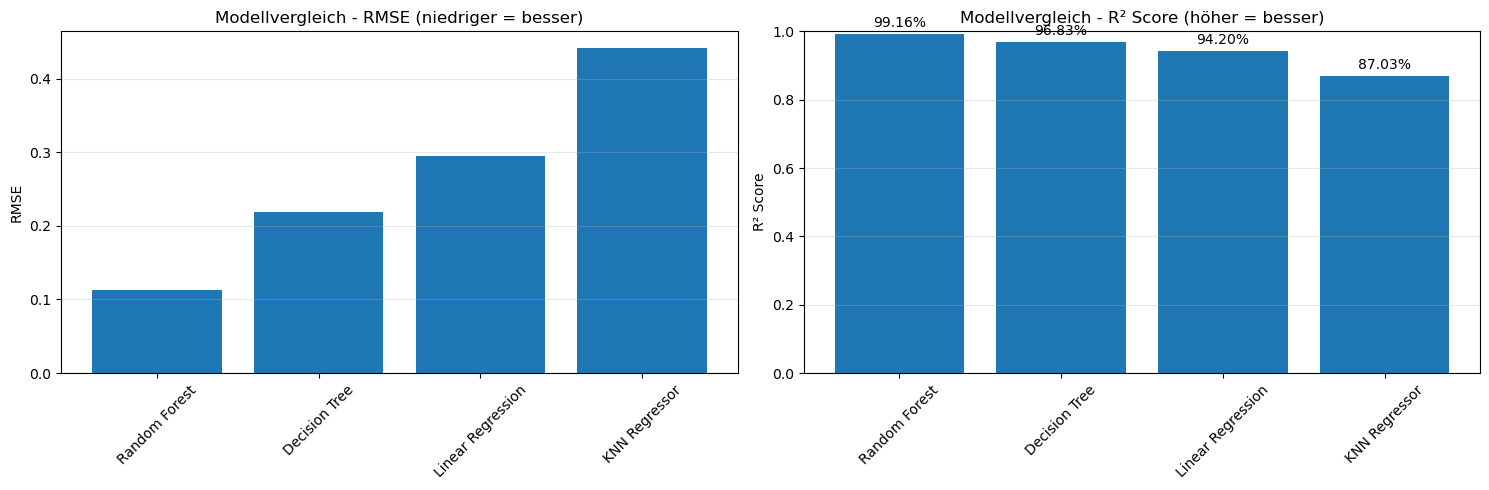

In [49]:
# Modellvergleich
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_knn, rmse_tree, rmse_rf],
    'R² Score': [r2_lr, r2_knn, r2_tree, r2_rf]
})
results = results.sort_values('R² Score', ascending=False)
print("\n=== Modellvergleich ===")
print(results.to_string(index=False))

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# RMSE
ax1.bar(results['Model'], results['RMSE'])
ax1.set_title('Modellvergleich - RMSE (niedriger = besser)')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# R² Score
ax2.bar(results['Model'], results['R² Score'])
ax2.set_title('Modellvergleich - R² Score (höher = besser)')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(results['R² Score']):
    ax2.text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()


---
## 8. Detaillierte Evaluation - Classification

**⚠️ Nur für Classification!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **Accuracy:** Anteil korrekter Vorhersagen
- **Confusion Matrix:** Welche Fehler macht das Modell?
- **Classification Report:** Precision, Recall, F1-Score pro Klasse

In [ ]:
# Wählen Sie Ihr bestes Modell aus Sektion 7A
# best_model = knn  # Beispiel
# y_pred_best = y_pred_knn

# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_best))


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**Interpretation der Confusion Matrix:**
- Diagonale: Korrekte Vorhersagen
- Außerhalb der Diagonalen: Fehler
- Welche Klassen werden am häufigsten verwechselt?

---
## 9. Detaillierte Evaluation - Regression

**⚠️ Nur für Regression!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **RMSE (Root Mean Squared Error):** Durchschnittlicher Fehler (in gleicher Einheit wie Target)
- **R² Score:** Wie gut erklärt das Modell die Varianz? (0-1, höher = besser)
- **Residual Plot:** Visualisierung der Fehler

In [51]:
# Wählen Sie Ihr bestes Modell aus Sektion 7B
best_model = rf  # Beispiel
y_pred_best = y_pred_rf

# Alle Metriken
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("=== Evaluation Metriken ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2%}")


=== Evaluation Metriken ===
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
Mean Absolute Error (MAE): 0.04
R² Score: 99.16%


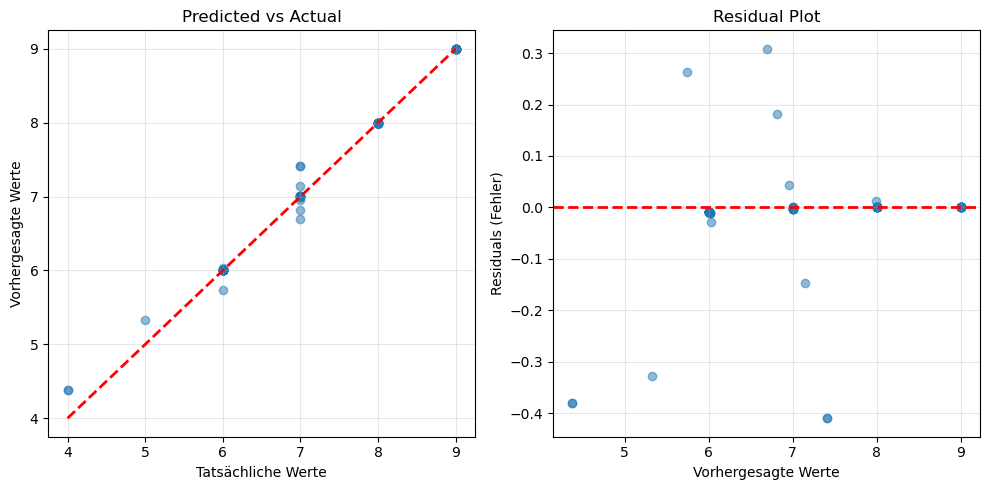

In [52]:
# Visualisierung: Predicted vs. Actual
plt.figure(figsize=(10, 5))

# Plot 1: Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Predicted vs Actual')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (Fehler)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuals (Fehler)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Interpretation:**
- **Predicted vs Actual:** Punkte sollten nahe der roten Linie liegen
- **Residual Plot:** Fehler sollten zufällig um 0 verteilt sein (kein Muster!)

---
## 10. Feature Importance (Optional)

**Aufgabe:** Finden Sie heraus, welche Features am wichtigsten sind.

**Hinweis:** Funktioniert nur für Decision Trees und Random Forests!

=== Feature Importance ===
                Feature  Importance
         Sleep Duration    0.797384
           Stress Level    0.126393
             Heart Rate    0.037495
                    Age    0.023838
            Daily Steps    0.012731
Physical Activity Level    0.002142
         Sleep Disorder    0.000016


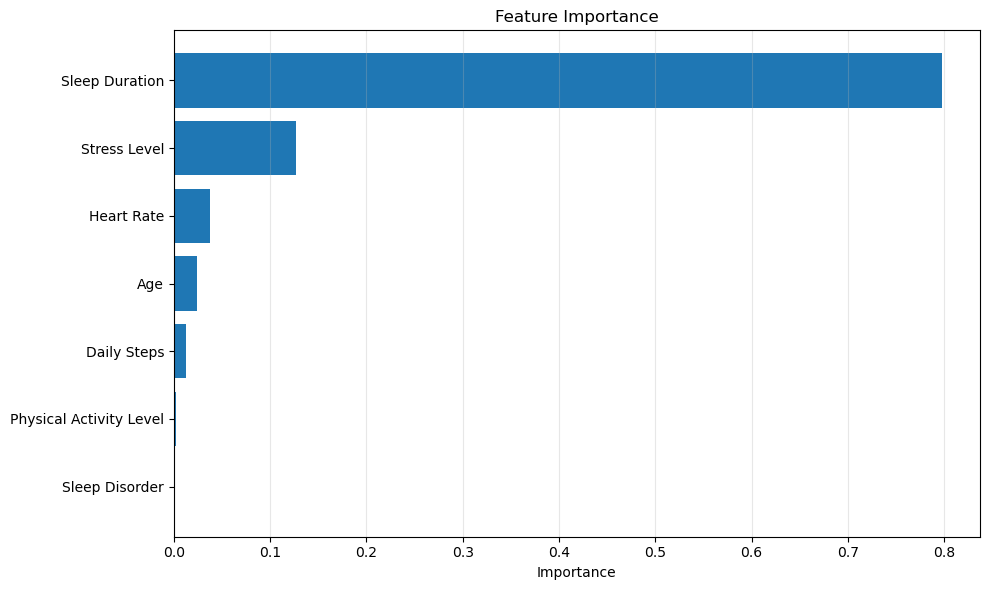

In [53]:
# Feature Importance für Decision Tree oder Random Forest
# Wählen Sie Ihr Tree-basiertes Modell:
model_with_importance = rf  # oder rf, tree_reg, etc.

importances = model_with_importance.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("=== Feature Importance ===")
print(feature_importance_df.to_string(index=False))

# Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


---
## 11. Vorhersagen auf neuen Daten

**Aufgabe:** Machen Sie Vorhersagen für neue, hypothetische Datenpunkte. Sie können z.B. per genAI neue Daten

**Hinweis:** Dies zeigt, wie Ihr Modell in der Praxis verwendet werden könnte!

In [56]:
# Beispiel: Neue Datenpunkte definieren
new_data = pd.DataFrame({
    'Sleep Duration': 7.1,
    'Stress Level': 5,
    'Heart Rate': 80,
    'Age': 21,
    'Daily Steps': 12000,
    'Physical Activity Level': 60,
    'Sleep Disorder': 1.0
})

# Vorhersage mit bestem Modell
prediction = best_model.predict(new_data)
print(f"Vorhersage für neue Daten: {prediction[0]}")

# Für Classification: Wahrscheinlichkeiten anzeigen
# if hasattr(best_model, 'predict_proba'):
#     probabilities = best_model.predict_proba(new_data)
#     print(f"Wahrscheinlichkeiten: {probabilities[0]}")


ValueError: If using all scalar values, you must pass an index

---
## 12. Reflexion und Dokumentation

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen:

### Ihre Reflexion:

**1. Problem-Typ und Forschungsfrage:**
   - Welches Problem haben Sie gelöst (Classification/Regression)?
   - Wie lautete Ihre Forschungsfrage?
   - ...

**2. Features und Target:**
   - Welche Features haben Sie verwendet?
   - Warum haben Sie diese Features gewählt?
   - Was ist Ihre Target-Variable?
   - ...

**3. Modellvergleich:**
   - Welches Modell hat am besten performt?
   - Wie gut ist die Performance (Accuracy/R²)?
   - Überrascht Sie das Ergebnis?
   - ...

**4. Interpretation:**
   - Welche Features sind am wichtigsten?
   - Macht das Sinn für Ihr Problem?
   - Welche Fehler macht das Modell?
   - ...

**5. Herausforderungen:**
   - Welche Schwierigkeiten gab es?
   - Wie haben Sie diese gelöst?
   - Was würden Sie beim nächsten Mal anders machen?
   - ...

**6. Nächste Schritte:**
   - Wie könnten Sie das Modell verbessern?
   - Mehr Features? Besseres Feature Engineering?
   - Andere Algorithmen?
   - Werden Sie ML in Ihrer Streamlit-App verwenden?
   - ...

---
## 13. Modell speichern (Optional)

**Aufgabe:** Speichern Sie Ihr bestes Modell, um es später in Streamlit zu verwenden.

**Hinweis:** Dies ist optional! Sie können auch direkt in Streamlit ein neues Modell trainieren.

In [ ]:
# Modell speichern mit pickle
# import pickle

# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

# print("Modell wurde gespeichert!")

# Später laden:
# with open('best_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)


---
## Zusammenfassung

**Sie haben in dieser Übung:**
- ✅ Ihr ML-Problem identifiziert (Classification/Regression)
- ✅ Features und Target definiert
- ✅ Train/Test Split durchgeführt
- ✅ Mehrere ML-Algorithmen trainiert und verglichen
- ✅ Das beste Modell evaluiert
- ✅ Feature Importance analysiert (optional)
- ✅ Vorhersagen auf neuen Daten gemacht

**Nächste Woche (Woche 10):**
- Machine Learning 2: Fortgeschrittene Evaluation
- Streamlit Einführung: Erste Web-App erstellen

**Tipp für Streamlit:**
- Nicht jedes Projekt braucht ML!
- Visualisierungen und explorative Analysen sind oft wertvoller
- Falls ML passt: Integrieren Sie Vorhersagen in Ihre App